# core

> Fill in a module description here

In [ ]:
#| default_exp cluster_ejemplo
#| hide
import nbdev; nbdev.nbdev_export()

In [ ]:
#| hide
#| export
from nbdev.showdoc import *
import matplotlib
import sklearn
import random
import numpy as np
import shapely
from sklearn.cluster import DBSCAN, HDBSCAN, OPTICS, KMeans
import matplotlib.pyplot as plt

In [ ]:
#| export
class data_points:
 
 """Una clase que contiene a los datos"""
 
 def __init__(self, n, min_x=0, min_y=0, max_x=1, max_y=1, seed=None):
    
   if seed is not None:
      
      random.seed(seed)
      
   Xpoint = np.random.uniform(low=min_x, high=max_x, size=n)

   Ypoint = np.random.uniform(low=min_y, high=max_y, size=n)

   self.Points = [shapely.Point(x[0], x[1]) for x in zip(Xpoint, Ypoint)]

 @classmethod
 def from_list(cls, list_points):
    
    """Se genera los datos usando una lista de puntos"""

    toto = cls(0)

    toto.Points = list_points
    
    return toto
 


 def get_points(self):

    """Una funcion que para obtener los puntos"""

    return self.Points
 
 
 
 def get_points_arr(self):

   """Una funcion que para obtener los puntos"""
 
   array_points = np.asarray(tuple(zip(self.get_X(),self.get_Y())))

   return array_points
 

 
 def get_Multypoint(self):
    
    """Regresa un objeto MultiPoint con los puntos"""

    return shapely.geometry.MultiPoint(self.Points)
 

 
 def get_X(self):

    """Regresa las coordenadas X"""

    return [x.x for x in self.Points]
 

 
 def get_Y(self):

    """Regresa las coordenadas X"""

    return [x.y for x in self.Points]
 


 def centroid(self):
    
    """Regresa el centroide de los puntos """
    
    return shapely.centroid(self.get_Multypoint())
    
    
    
 def as_array(self):
    
    """Regresa los puntos como un array"""
    
    list_arrays = np.array([(geom.xy[0][0], geom.xy[1][0]) for 
    geom in self.Points])

    return list_arrays
 


 def add_points(self, data_points):
    
    """Agrega puntos de otra """
    
    self.Points = self.Points + data_points.Points
    
    return
 



In [ ]:
#| hide

datos_simples = data_points(40)

datos_simples.get_points()

datos_simples.get_points()

datos_simples.get_Multypoint()

datos_simples.get_X()

datos_simples.get_Y()

if len(datos_simples.get_X()) != len(datos_simples.get_Y()):
 raise Exception("Si hay problema la evaluacion ")

In [ ]:
#| export
class Clusters:
 """Una clase que contiene los clusters"""
 
 def __init__(self, data_structure):
   
   self.data_structure = data_structure


 def DBSCAN(self, eps=0.3, min_samples=5):
   
   """Realiza un DBSCAN clustering"""
   
   clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(self.data_structure.as_array())
   
   self.data_structure.classes_DBSCAN = clustering.labels_
   
   return clustering
 
 
 
 def KMeans(self, n_clusters=4):
   
   """Realiza un KMeans clustering"""
   
   clustering = KMeans(n_clusters=n_clusters).fit(self.
   data_structure.as_array())
   
   self.data_structure.classes_Kmeans = clustering.labels_
   
   return clustering
 
 
 
 def HDBSCAN(self, min_cluster_size=5):
   
   """Realiza un HDBSCAN clustering"""
   
   clustering = HDBSCAN(min_cluster_size=min_cluster_size).fit(self.data_structure.as_array())
   
   self.data_structure.classes_HDBSCAN = clustering.labels_
   
   return clustering
 
 
 
 def OPTICS(self, min_samples=5):
   """Realiza un OPTICS clustering"""
   clustering = OPTICS(min_samples=min_samples).fit(self.data_structure.as_array())
   self.data_structure.classes_OPTICS = clustering.labels_
   return clustering

In [ ]:
show_doc(Clusters.DBSCAN)


---

### Clusters.DBSCAN

>      Clusters.DBSCAN (eps=0.3, min_samples=5)

*Realiza un DBSCAN clustering*

In [ ]:
show_doc(Clusters.KMeans)

---

### Clusters.KMeans

>      Clusters.KMeans (n_clusters=4)

*Realiza un KMeans clustering*

In [ ]:
show_doc(Clusters.HDBSCAN)

---

### Clusters.HDBSCAN

>      Clusters.HDBSCAN (min_cluster_size=5)

*Realiza un HDBSCAN clustering*

In [ ]:
show_doc(Clusters.OPTICS)

---

### Clusters.OPTICS

>      Clusters.OPTICS (min_samples=5)

*Realiza un OPTICS clustering*

In [ ]:
#| hide
datos_simples = data_points(40)

cluster_all = Clusters(datos_simples)

cluster_all.DBSCAN()

cluster_all.KMeans()

cluster_all.HDBSCAN()

cluster_all.OPTICS()

OPTICS()

In [ ]:
#| hide
datos_simples_3 = data_points(500, min_x=0.6, min_y=0.6, max_x=1.0, max_y
=1.0)

datos_simples_2 = data_points(500, min_x=0.0, min_y=0.6, max_x=0.4, max_y
=1.0)

datos_simples_1 = data_points(500, min_x=0.6, min_y=0.0, max_x=1.0, max_y
=0.4)

datos_simples_0 = data_points(500, min_x=0.0, min_y=0.0, max_x=0.4, max_y
=0.4)

datos_simples_0.add_points(datos_simples_1)

datos_simples_0.add_points(datos_simples_2)

datos_simples_0.add_points(datos_simples_3)

datos_simples_0.get_Multypoint()

cluster_all = Clusters(datos_simples_0)

cluster_all.OPTICS()

cluster_all.HDBSCAN()

cluster_all.DBSCAN(eps=0.1, min_samples=10)

cluster_all.KMeans()

KMeans(n_clusters=4)

<matplotlib.collections.PathCollection>

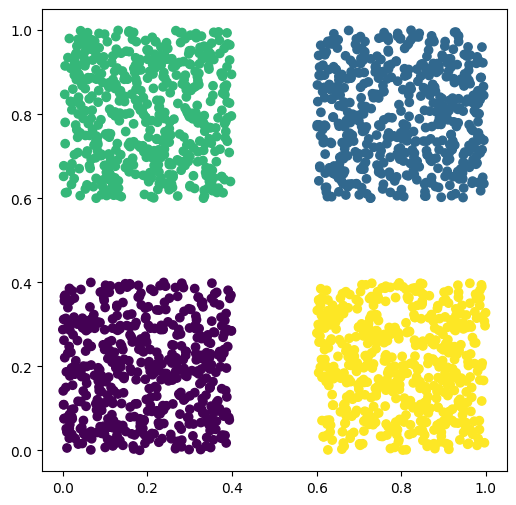

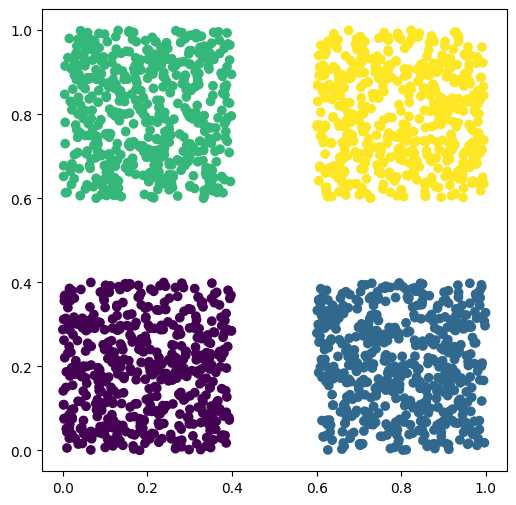

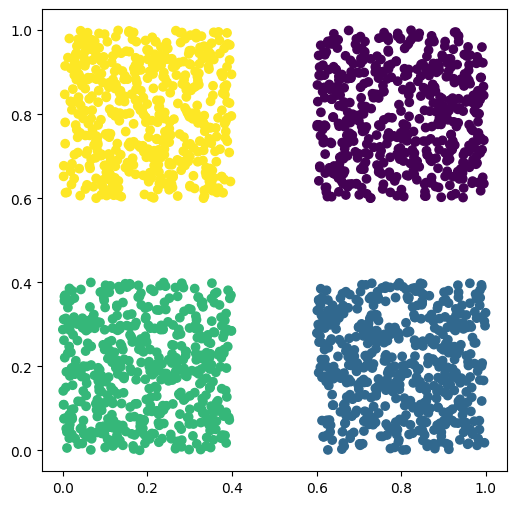

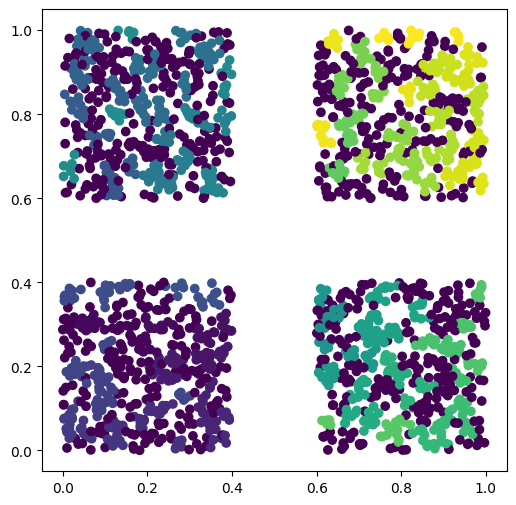

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.scatter(
 cluster_all.data_structure.get_X(),
 cluster_all.data_structure.get_Y(),
 c=cluster_all.data_structure.classes_Kmeans
)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.scatter(
 cluster_all.data_structure.get_X(),
 cluster_all.data_structure.get_Y(),
 c=cluster_all.data_structure.classes_DBSCAN
)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.scatter(
 cluster_all.data_structure.get_X(),
 cluster_all.data_structure.get_Y(),
 c=cluster_all.data_structure.classes_HDBSCAN
)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
plt.scatter(
 cluster_all.data_structure.get_X(),
 cluster_all.data_structure.get_Y(),
 c=cluster_all.data_structure.classes_OPTICS
)
